In [1]:
import os
import numpy as np
import netCDF4 as nc4
import shutil
import warnings
warnings.filterwarnings('ignore')
import xarray as xr
from matplotlib import pyplot as plt

In [2]:
doanalysis = 1
paramfileroot='/glade/work/rfisher/FATES_calibration/FATES_NOCOMP_OAAT/paramfiles/'

ncases=250
#where are we now?
notebookdr=os.getcwd() 
ens_directory='FATES_NOCOMP_FBG_PPE_spbase_nudged_intmaxmin'
ncases=250

ens_directory='FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin'
ncases=240

ens_directory='FATES_NOCOMP_FBG_PPE_spbase_nudged_atkin_vertsc_dayl_intmaxmin'
ncases=240
ychoose = 60

ens_directory='FATES_NOCOMP_FBG_PPE_spbase_nudged_atkin_vertsc_dayl_outp'
ncases=240
ychoose=60 
pfileroot = paramfileroot+'nocomp_oaat_v5_'

vs=range(1,ncases+1) 

USER='rfisher'

#path to scratch (or where the model is built.)
output_dir='/glade/derecho/scratch/'+USER+'/'

caseroot=ens_directory

In [3]:
if doanalysis ==1: 
    conv = 3600*24*365
    yr='.clm2.h0.'   
    delta=1
    print('ychoose=', ychoose)
    rel=1


ychoose= 60


In [4]:
def make_directory(fileroot):   
    if(os.path.isdir(fileroot)):
        print('dir exists:'+fileroot)
    else:
        os.mkdir(fileroot)
        print('made: '+fileroot)

#### ANALYSIS: Choose variables to read in

In [5]:
vars=['FATES_GPP','FATES_NPP','FATES_LAI','QFLX_EVAP_TOT','FATES_GROWTH_RESP',
      'FATES_MAINT_RESP','FATES_LEAFMAINTAR','FATES_VEGC','FATES_VEGC_ABOVEGROUND','FATES_NPLANT_PF','FATES_TRIMMING','lat','lon','time']

 #### ANALYSIS: Make output figure directory

In [6]:
figpath = (notebookdr+'/'+ 'figs_'+ens_directory+'/')
make_directory(figpath)


dir exists:/glade/u/home/rfisher/rosiefork_fates_global_cal/rosie_ppe/output_nocomp_ensemble_python/figs_FATES_NOCOMP_FBG_PPE_spbase_nudged_atkin_vertsc_dayl_outp/


####  ANALYSIS: Make a single data structure for the ensemble

In [7]:
def is_odd(number):
    if number % 2 == 1:
        return True
    else:
        return False

In [8]:
print(output_dir,ncases)
caseroot=ens_directory
if doanalysis ==1:
    debug=0
    firstgo=1
    mins_ds=[]
    maxs_ds=[]
    count=1
    missing=range(0,ncases+1)
    missing=np.multiply(missing,0)
    for i in vs: 
        run=caseroot+str(i)
        if(ychoose<10):
            hstring='.clm2.h0.000'
        elif (ychoose<100):
            hstring='.clm2.h0.00'
        else:
            hstring='.clm2.h0.0' 
        #os.listdir(output_dir + '/archive')
        ahpath = output_dir + 'archive/' + run + '/lnd/hist/' 
        rhpath = output_dir + run + '/run/' 
        
        tfile = run+hstring+str(ychoose)+'-02-01-00000.nc'
        missing[i]=1
        #if(os.path.isdir(hpath)): ! #there is an archive
        if(os.path.isfile(rhpath+tfile)):  # this years is in the archive. 
            hpath = rhpath
            if debug == 1 :print('file in archive',rhpath)
            missing[i]=0
        else:
            if debug == 1 :print('file not in archive. try rundir',hpath+tfile)                
            hpath = ahpath       
            if(os.path.isdir(hpath)): 
                #print('there is a rundir',hpath+tfile)                
                if(os.path.isfile(hpath+tfile)):
                    if debug == 1 :print('file in  rundir')
                    missing[i]=0
                else:
                    print('no file in rundir',hpath+tfile)
            else:
                print('there is no  rundir',hpath+tfile)
                
        if(missing[i]==0): # the year can be found. 
            rt=hpath+run+yr+str(ychoose)+'*'
            rt=hpath+tfile
            if(firstgo==1):
                tmp = xr.open_mfdataset(rt, decode_times=False)  
                allvars=list(xr.open_dataset(hpath+tfile, decode_times=False).variables)
                dropvars=list(set(allvars) - set(vars)) 
                firstgo=0
            #print('rt',rt)
            tmp=xr.open_mfdataset(rt, decode_times=False, drop_variables=dropvars)
        else:
            print('MISSING INPUT')
          
        if i==vs[0]:
            try: 
                del dsc
            except:
                print('no dsc')
            dsc = tmp           
        else:
            if(np.max(tmp.lon)>0):
                dsc=xr.concat([dsc,tmp],'ens')
            else:
                print('lon is zero',i)
        if(is_odd(i)):
            mins_ds.append(tmp)

        else:
            maxs_ds.append(tmp)
        print(i,tmp.FATES_LAI.mean().values)
print('end')

/glade/derecho/scratch/rfisher/ 240
no dsc
1 1.0723108
2 1.2176088
3 1.1777304
4 1.2700511
5 1.2819306
6 1.1930183
there is no  rundir /glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_atkin_vertsc_dayl_outp7/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_atkin_vertsc_dayl_outp7.clm2.h0.0060-02-01-00000.nc
MISSING INPUT
7 1.1930183
8 1.1791154
9 1.2233046
10 1.2307444
11 1.2280093
12 1.2313515
13 1.0764407
14 1.1243682
15 0.7239803
16 1.5874251
17 1.183872
18 1.3180661
19 1.2722949
20 1.1814007
21 1.6651819
22 1.0113164
23 1.3428864
24 1.1814649
25 1.2872599
26 1.1831795
27 1.2338836
28 1.2048857
29 1.2214725
30 1.2269304
31 1.2300441
32 1.2332295
33 1.3875527
34 1.0329437
35 1.231066
36 1.2352424
37 1.2400463
38 1.2347293
39 1.2694042
40 1.2125882
41 1.2320517
42 1.2320517
43 1.2320517
44 1.2320517
45 1.2320517
46 1.2320517
47 1.2320517
48 1.2320517
49 1.2320517
50 1.2320517
51 1.2517921
52 1.2313303
53 1.2869799
54 1.2183656
55 1.0609334
56 1.2193847
57 1.2313038

In [9]:
import pandas as pd
ncases=240
vsp=range(1,ncases+1) 
ps=[]
params= [0] * 241
found = [0] * 241
paramsp=['not found'] * 121
paramsp[0]='fates_alloc_storage_cushion'
if doanalysis ==1:
    for i in vsp: 
        run=caseroot+str(i)
        rhpath = output_dir + run + '/run/' 
        pfile1= nc4.Dataset(pfileroot+str(i)+'.nc', 'r+')  
        pfile2= nc4.Dataset(pfileroot+str(1)+'.nc', 'r+')  
        nc_file=nc4.Dataset(pfileroot+str(1)+'.nc', 'r+')  
        for var_name in nc_file.variables:
              
            variable_to_check1 = pfile1.variables[var_name]    
            # Add your modification code here for each variable
            ndim = variable_to_check1.ndim   
            if(ndim==1):
                var1=pfile1.variables[var_name][:]
            elif(ndim==2):
                var1=pfile1.variables[var_name][:,:]
            else:
                var1=pfile1.variables[var_name]
       
            if(ndim==1):
                var2=pfile2.variables[var_name][:]
            elif(ndim==2):
                var2=pfile2.variables[var_name][:,:]
            else:
                var2=pfile2.variables[var_name]
            param_i=int(np.floor((i+1)/2)-1)
            if not np.array_equal(var1, var2):
                ps.append(var_name)
                params[i]=var_name
               
                if(not var_name=='fates_alloc_storage_cushion'):
                    paramsp[param_i]=var_name
                    if(missing[i]==1):
                        print(i, param_i,paramsp[param_i],str(missing[i]))
                    found[i]=1
            if(missing[i]==1):
                params[i] = 'nan'
                paramsp[param_i] = 'missing'
        if(found[i]==0):
            print(i,param_i,'no difference')
                
         
            # Close the file
        nc_file.close()
        pfile1.close()
        pfile2.close()
        

1 0 no difference
2 0 no difference
7 3 fates_allom_agb2 1
81 40 fates_frag_cwd_frac 1
82 40 fates_frag_cwd_frac 1
139 69 no difference
140 69 no difference
141 70 no difference
142 70 no difference
143 71 no difference
144 71 no difference
145 72 no difference
146 72 no difference
177 88 no difference
178 88 no difference
188 93 fates_rad_stem_rhonir 1
204 101 no difference


In [10]:
appended_dict = {}
for p in range(0,120):
     mntlai_mean=mins_ds[p].FATES_LAI.mean(dim=['gridcell', 'time'])
     mxtlai_mean=maxs_ds[p].FATES_LAI.mean(dim=['gridcell', 'time'])
     print(p,mntlai_mean.values,mxtlai_mean.values,paramsp[p])


0 1.0723108 1.2176088 fates_alloc_storage_cushion
1 1.1777304 1.2700511 fates_allom_agb_frac
2 1.2819306 1.1930183 fates_allom_agb1
3 1.1930183 1.1791154 fates_allom_agb2
4 1.2233046 1.2307444 fates_allom_agb3
5 1.2280093 1.2313515 fates_allom_agb4
6 1.0764407 1.1243682 fates_allom_blca_expnt_diff
7 0.7239803 1.5874251 fates_allom_d2bl1
8 1.183872 1.3180661 fates_allom_d2bl2
9 1.2722949 1.1814007 fates_allom_d2bl3
10 1.6651819 1.0113164 fates_allom_d2ca_coefficient_max
11 1.3428864 1.1814649 fates_allom_d2ca_coefficient_min
12 1.2872599 1.1831795 fates_allom_d2h1
13 1.2338836 1.2048857 fates_allom_d2h2
14 1.2214725 1.2269304 fates_allom_dbh_maxheight
15 1.2300441 1.2332295 fates_allom_frbstor_repro
16 1.3875527 1.0329437 fates_allom_l2fr
17 1.231066 1.2352424 fates_allom_la_per_sa_int
18 1.2400463 1.2347293 fates_allom_la_per_sa_slp
19 1.2694042 1.2125882 fates_allom_sai_scaler
20 1.2320517 1.2320517 fates_allom_zroot_k
21 1.2320517 1.2320517 fates_allom_zroot_max_dbh
22 1.2320517 1.23

In [11]:
SPparams=['fates_leaf_vcmaxse', 
'fates_leaf_jmaxse',
'fates_leaf_vcmaxha',
'fates_leaf_vcmaxhd',
'fates_leaf_stomatal_intercept',
'fates_leaf_vcmax25top',
'fates_maintresp_leaf_atkin2017_baserate',
'fates_leaf_stomatal_slope_ballberry',
'fates_nonhydro_smpsc',
'fates_leaf_theta_cj_c4',
'fates_rad_leaf_clumping_index',
'fates_leaf_theta_cj_c3']

s='fates_nonhydro_smpsc'
if s in SPparams:
    print(f'{s} is present in the list')
else:
    print(f'{s} is not present in the list')   

fates_nonhydro_smpsc is present in the list


### Create a figure of the ranked parameter 

In [12]:
def make_figure_of_param_effects(varn):
    appended_dict = {}
    for p in range(0,len(mins_ds)):
         mn_da=mins_ds[p]
         mx_da=maxs_ds[p]
         mn_mean=mn_da[varn].mean(dim=mn_da[varn].dims)
         mx_mean=mx_da[varn].mean(dim=mn_da[varn].dims)
         peffect = -1*abs(mx_mean-mn_mean)
         appended_dict['ordered_ensemble'+str(p)] = {'param_name': paramsp[p], 'peffect': peffect,'minv':mn_mean,'maxv':mx_mean ,'pindex':p}
         #print(p,paramsp[p],mn_mean.values,mx_mean.values)
    sorted_dict= dict(sorted(appended_dict.items(), key=lambda item: item[1]['peffect']))

    fig = plt.figure()
    plt.rcParams['figure.figsize'] =[12,16];
    p=0
    nshow=30
    parray=['']*(nshow+1)
    for key in sorted_dict:
        minl=sorted_dict[key]['minv'].values
        maxl=sorted_dict[key]['maxv'].values
        if not sorted_dict[key]['param_name'] in SPparams:
            p=p+1
            if(p < nshow):
                parray[nshow-p]=sorted_dict[key]['param_name'] 
                plt.plot([minl, maxl], [nshow-p, nshow-p], color='r',linewidth=2)  # Plot parallel horizontal lines
                plt.scatter(minl, nshow-p, color='r',s=80,facecolors='none')  # Plot the points   
                plt.scatter(maxl, nshow-p, color='r',s=80)  # Plot the points 
              #  print('p',sorted_dict[key]['pindex']) #,parray[nshow-p],minl,sorted_dict[key]['param_name'] )
    plt.yticks(range(1, nshow), parray[1:nshow],fontsize=16)  # Set y-axis labels to custom strings
    plt.grid(True, linestyle=':', linewidth=0.5, color='grey')
    plt.xlabel('Mean Global '+varn,fontsize=20)
    
    plt.gcf().set_size_inches(7, 12)
    plt.savefig(figpath+'ranked_parameter_impacts_'+varn+'y'+str(ychoose)+'.png',bbox_inches='tight')  
    plt.show()


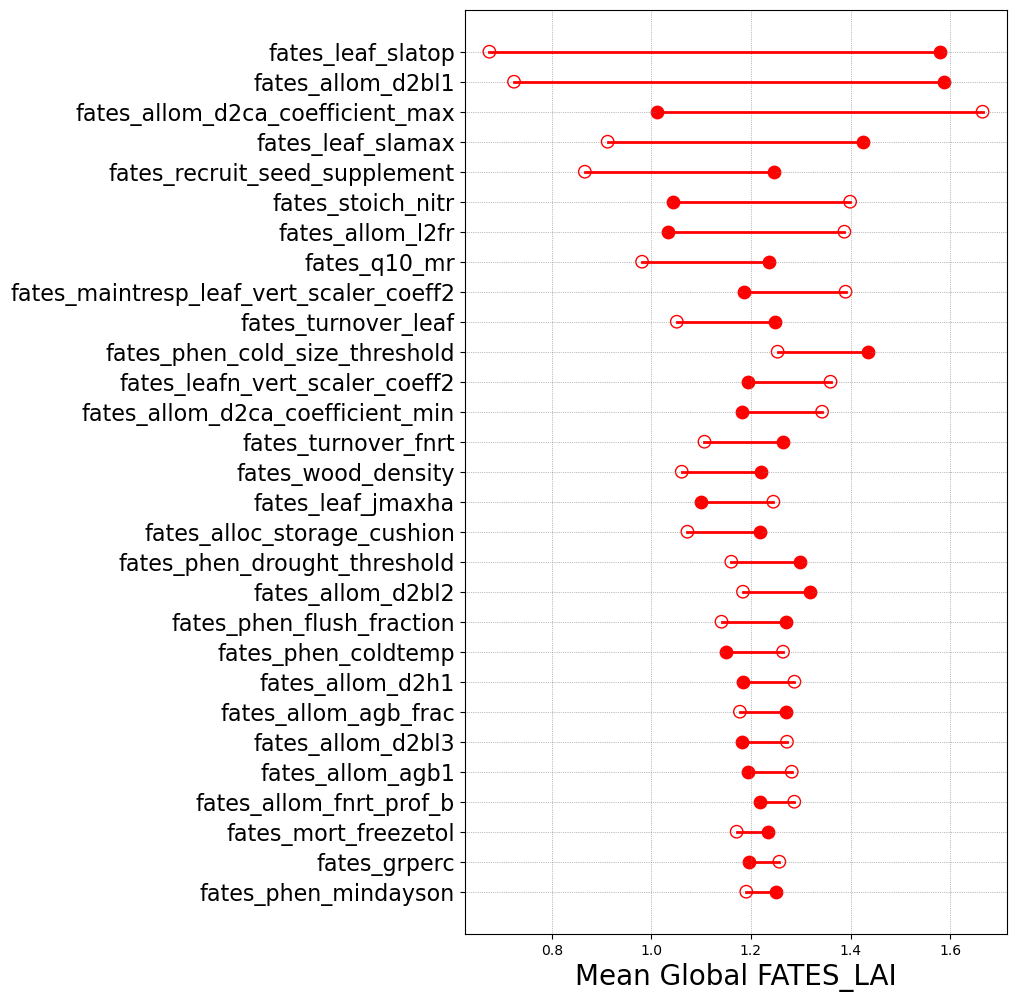

In [13]:
make_figure_of_param_effects('FATES_LAI')

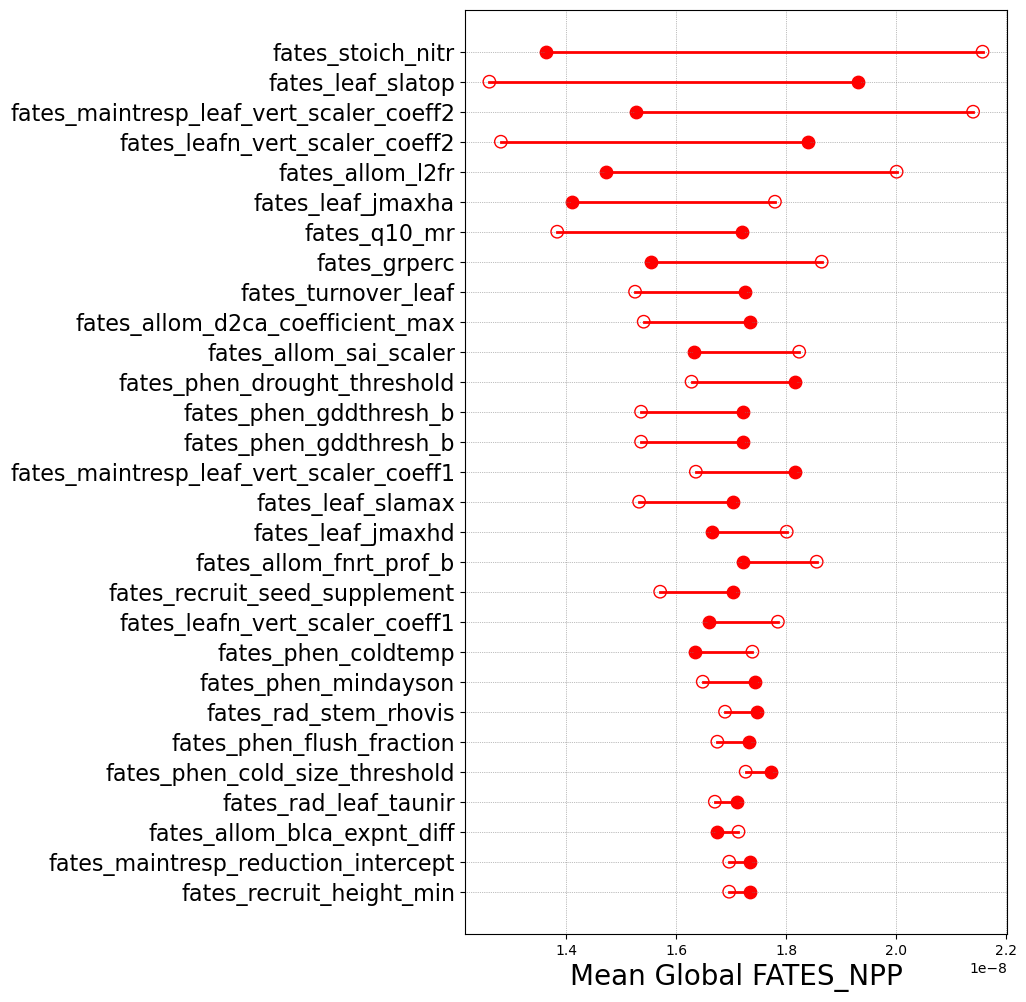

In [14]:
make_figure_of_param_effects('FATES_NPP')

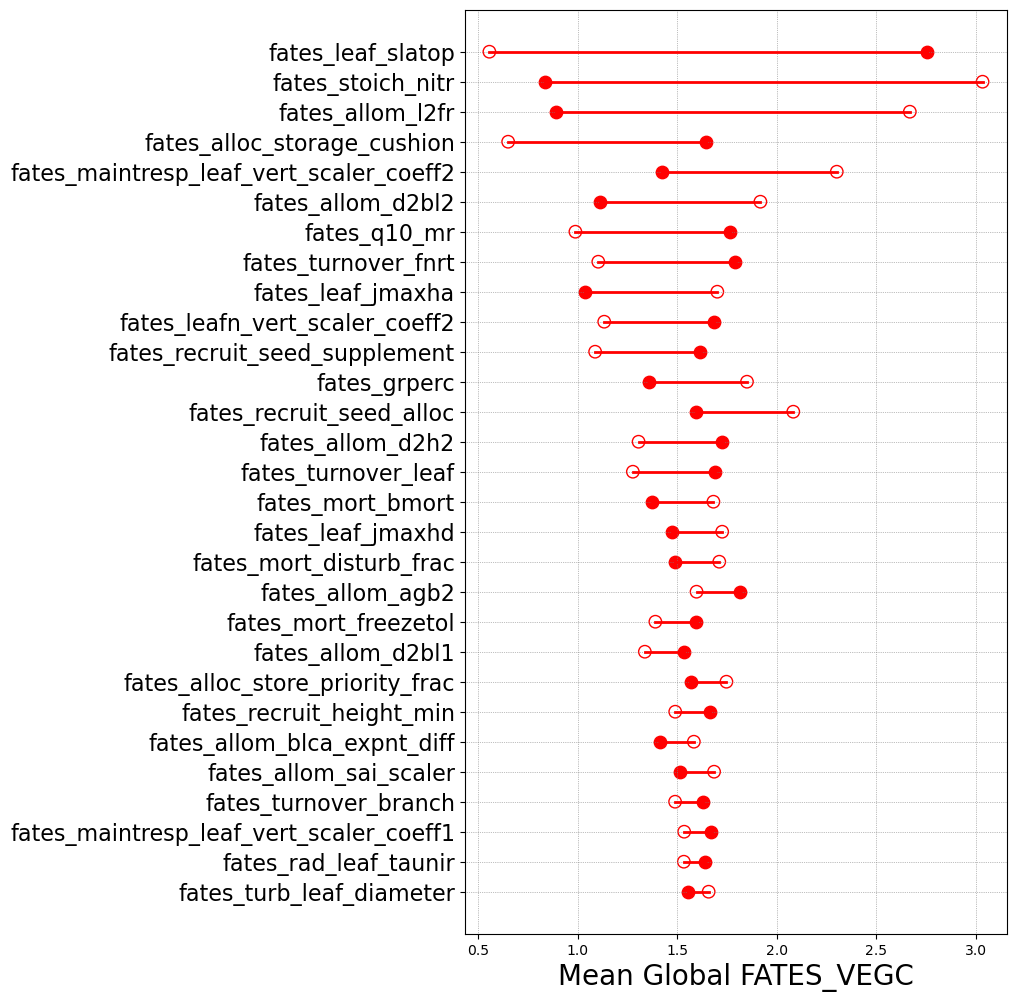

In [15]:
make_figure_of_param_effects('FATES_VEGC')

### Make differences plots for top ranked parameters. 

In [16]:
sgpath='sgmap.nc'

In [17]:
def get_map(da,sgmap=None):
    if not sgmap:
        sgmap=xr.open_dataset(sgpath)
    return da.sel(gridcell=sgmap.cclass).where(sgmap.notnan).compute()

In [18]:
def plot_top_param_effects(varn, nshow,lim):
    appended_dict = {}
    
    for p in range(0,len(mins_ds)):
         mn_da=mins_ds[p]
         mx_da=maxs_ds[p]
         mn_mean=mn_da[varn].mean(dim=mn_da[varn].dims)
         mx_mean=mx_da[varn].mean(dim=mn_da[varn].dims)
         peffect = -1*abs(mx_mean-mn_mean)
         appended_dict['ordered_ensemble'+str(p)] = {'param_name': paramsp[p], 'peffect': peffect,'minv':mn_mean,'maxv':mx_mean ,'pindex':p}
         #print(p,paramsp[p],mn_mean.values,mx_mean.values)
    sorted_dict= dict(sorted(appended_dict.items(), key=lambda item: item[1]['peffect']))

    top_plist=[]
    fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 8))
    fig.suptitle('Impact of parameter range on mean annual ' + varn,y=0.93)
    plt.subplots_adjust(wspace=0.1, hspace=0.05)
    p=-1
    axcount=0
    print(varn)
    for key in sorted_dict:
        
        if not sorted_dict[key]['param_name'] in SPparams:
            p=p+1
            pind=sorted_dict[key]['pindex']
            if(p < nshow[1] and p >= nshow[0]):
                row = axcount // 4
                col = axcount % 4
                axcount=axcount+1
                minind=pind*2-1
                mntlai=mins_ds[pind][varn].mean(dim=['time'])
                mxtlai=maxs_ds[pind][varn].mean(dim=['time'])       
                diff=mxtlai-mntlai
                mapped_diff = get_map(diff)
                mapped_diff = np.flip(mapped_diff,0)
                diffplot=axes[row, col].imshow(mapped_diff,cmap='RdYlBu',vmin=-1*lim ,vmax=lim)
                pname=sorted_dict[key]['param_name'] 
                top_plist.append(pname)
                print(pname)
                axes[row, col].set_title(pname)   
                axes[row, col].set_xticklabels([]) 
                axes[row, col].set_yticklabels([]) 
    cbar = fig.colorbar(diffplot, ax=axes, orientation='vertical', shrink=0.6)
    plt.savefig(figpath+'map_parameter_impacts_'+varn+'_y'+str(ychoose)+'nshow'+str(nshow[0])+'-'+str(nshow[1])+'.png',bbox_inches='tight')  
    plt.show()
    print(top_plist)


FATES_LAI
fates_leaf_slatop
fates_allom_d2bl1
fates_allom_d2ca_coefficient_max
fates_leaf_slamax
fates_recruit_seed_supplement
fates_stoich_nitr
fates_allom_l2fr
fates_q10_mr
fates_maintresp_leaf_vert_scaler_coeff2
fates_turnover_leaf
fates_phen_cold_size_threshold
fates_leafn_vert_scaler_coeff2


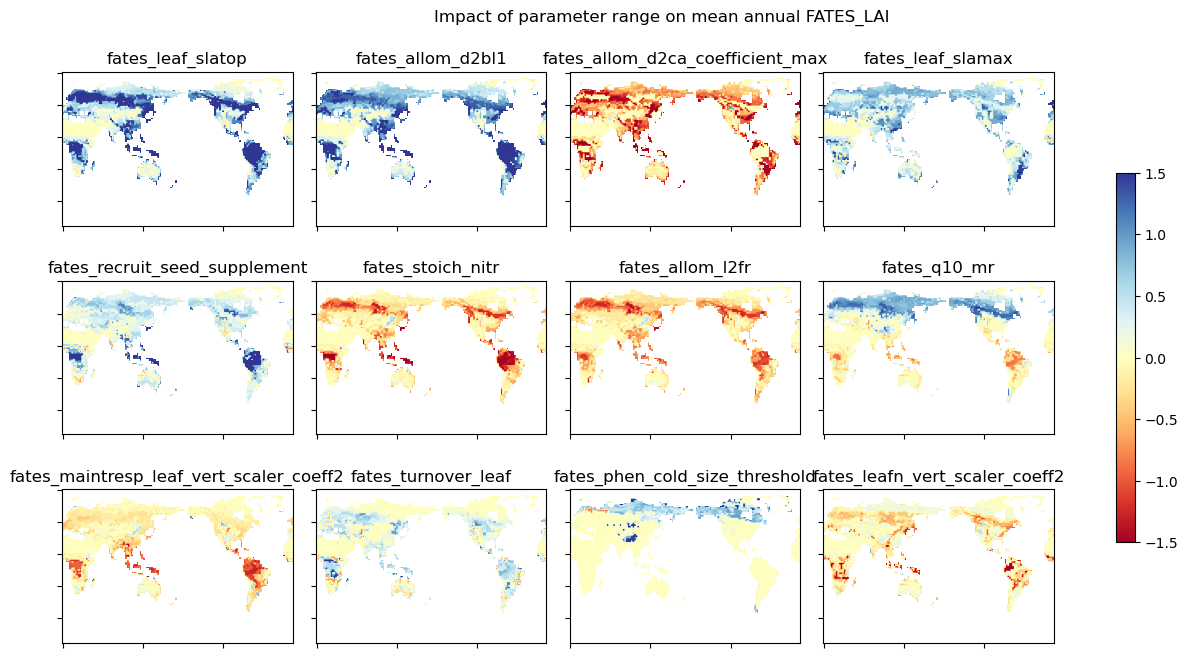

['fates_leaf_slatop', 'fates_allom_d2bl1', 'fates_allom_d2ca_coefficient_max', 'fates_leaf_slamax', 'fates_recruit_seed_supplement', 'fates_stoich_nitr', 'fates_allom_l2fr', 'fates_q10_mr', 'fates_maintresp_leaf_vert_scaler_coeff2', 'fates_turnover_leaf', 'fates_phen_cold_size_threshold', 'fates_leafn_vert_scaler_coeff2']


In [19]:
plot_top_param_effects('FATES_LAI',[0 ,12],1.5)

FATES_LAI
fates_allom_d2ca_coefficient_min
fates_turnover_fnrt
fates_wood_density
fates_leaf_jmaxha
fates_alloc_storage_cushion
fates_phen_drought_threshold
fates_allom_d2bl2
fates_phen_flush_fraction
fates_phen_coldtemp
fates_allom_d2h1
fates_allom_agb_frac
fates_allom_d2bl3


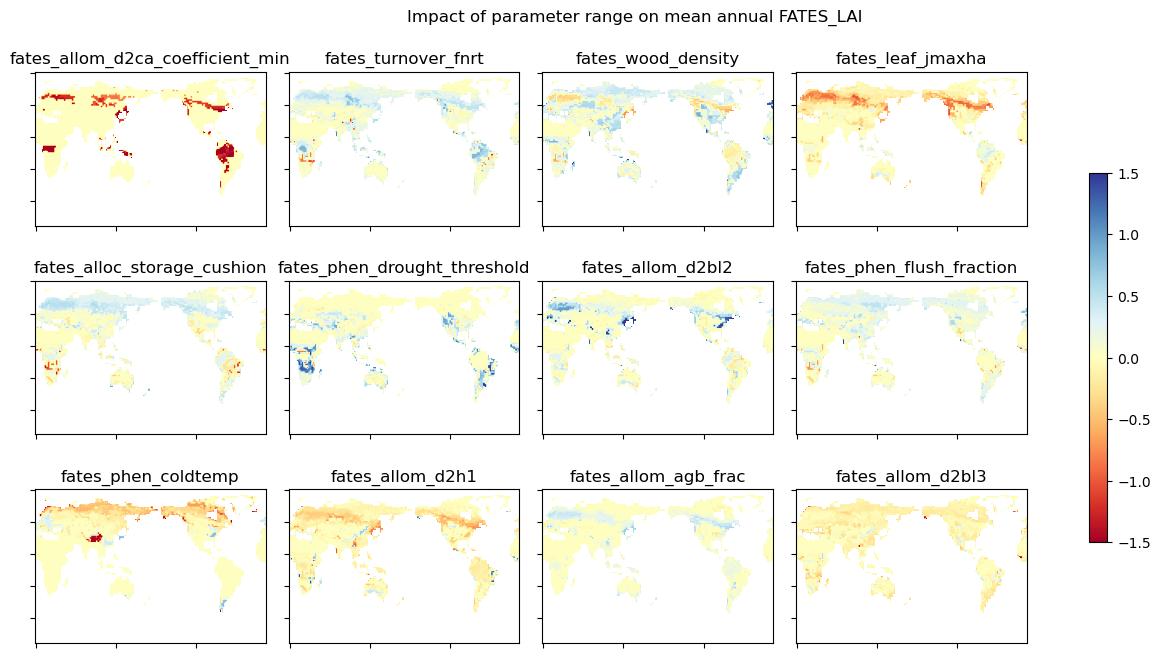

['fates_allom_d2ca_coefficient_min', 'fates_turnover_fnrt', 'fates_wood_density', 'fates_leaf_jmaxha', 'fates_alloc_storage_cushion', 'fates_phen_drought_threshold', 'fates_allom_d2bl2', 'fates_phen_flush_fraction', 'fates_phen_coldtemp', 'fates_allom_d2h1', 'fates_allom_agb_frac', 'fates_allom_d2bl3']


In [20]:
plot_top_param_effects('FATES_LAI',[12 ,24],1.5)

FATES_NPP
fates_stoich_nitr
fates_leaf_slatop
fates_maintresp_leaf_vert_scaler_coeff2
fates_leafn_vert_scaler_coeff2
fates_allom_l2fr
fates_leaf_jmaxha
fates_q10_mr
fates_grperc
fates_turnover_leaf
fates_allom_d2ca_coefficient_max
fates_allom_sai_scaler
fates_phen_drought_threshold


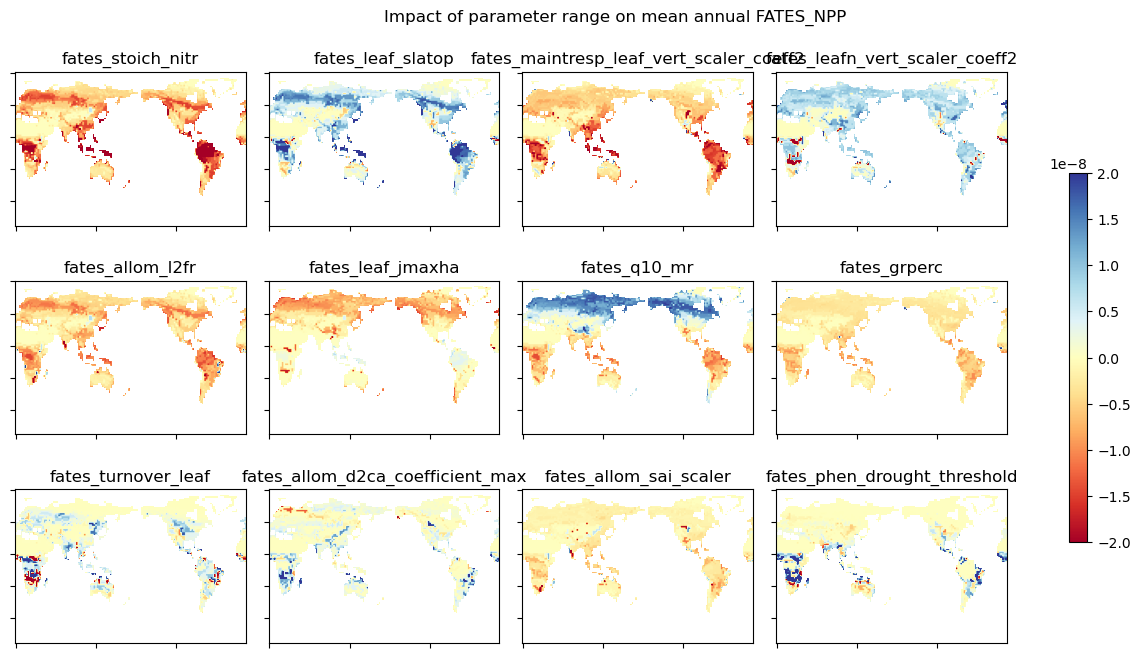

['fates_stoich_nitr', 'fates_leaf_slatop', 'fates_maintresp_leaf_vert_scaler_coeff2', 'fates_leafn_vert_scaler_coeff2', 'fates_allom_l2fr', 'fates_leaf_jmaxha', 'fates_q10_mr', 'fates_grperc', 'fates_turnover_leaf', 'fates_allom_d2ca_coefficient_max', 'fates_allom_sai_scaler', 'fates_phen_drought_threshold']


In [21]:
plot_top_param_effects('FATES_NPP',[0, 12],2e-8)

FATES_NPP
fates_phen_gddthresh_b
fates_maintresp_leaf_vert_scaler_coeff1
fates_leaf_slamax
fates_leaf_jmaxhd
fates_allom_fnrt_prof_b
fates_recruit_seed_supplement
fates_leafn_vert_scaler_coeff1
fates_phen_coldtemp
fates_phen_mindayson
fates_rad_stem_rhovis
fates_phen_flush_fraction
fates_phen_cold_size_threshold


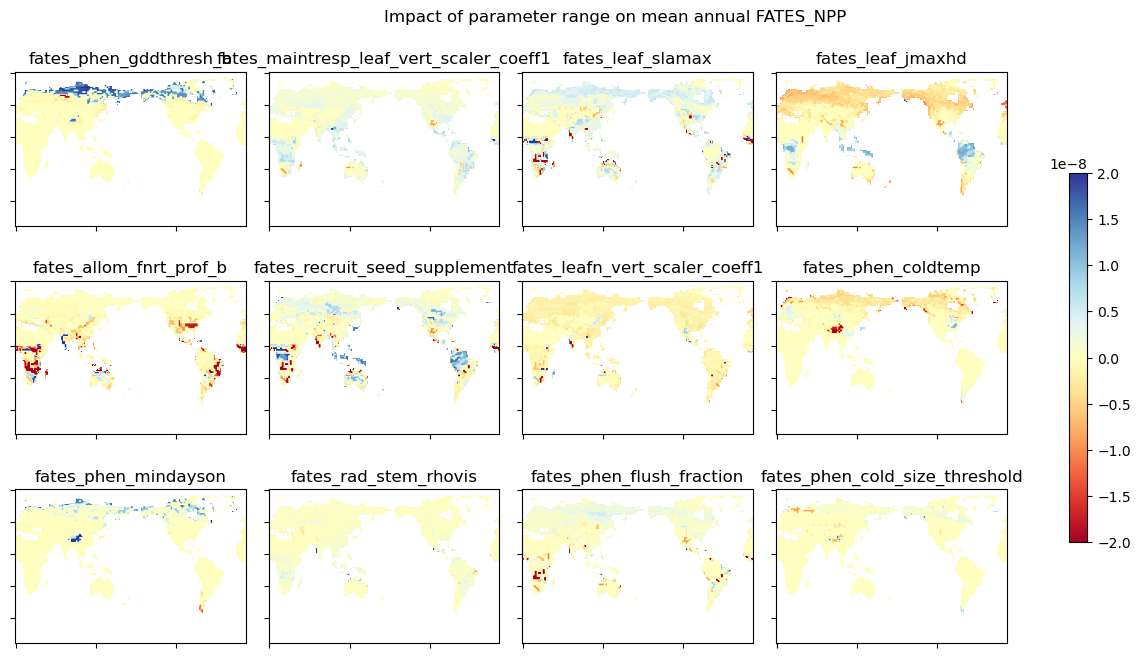

['fates_phen_gddthresh_b', 'fates_maintresp_leaf_vert_scaler_coeff1', 'fates_leaf_slamax', 'fates_leaf_jmaxhd', 'fates_allom_fnrt_prof_b', 'fates_recruit_seed_supplement', 'fates_leafn_vert_scaler_coeff1', 'fates_phen_coldtemp', 'fates_phen_mindayson', 'fates_rad_stem_rhovis', 'fates_phen_flush_fraction', 'fates_phen_cold_size_threshold']


In [22]:
plot_top_param_effects('FATES_NPP',[13, 25],2e-8)

FATES_VEGC
fates_leaf_slatop
fates_stoich_nitr
fates_allom_l2fr
fates_alloc_storage_cushion
fates_maintresp_leaf_vert_scaler_coeff2
fates_allom_d2bl2
fates_q10_mr
fates_turnover_fnrt
fates_leaf_jmaxha
fates_leafn_vert_scaler_coeff2
fates_recruit_seed_supplement
fates_grperc


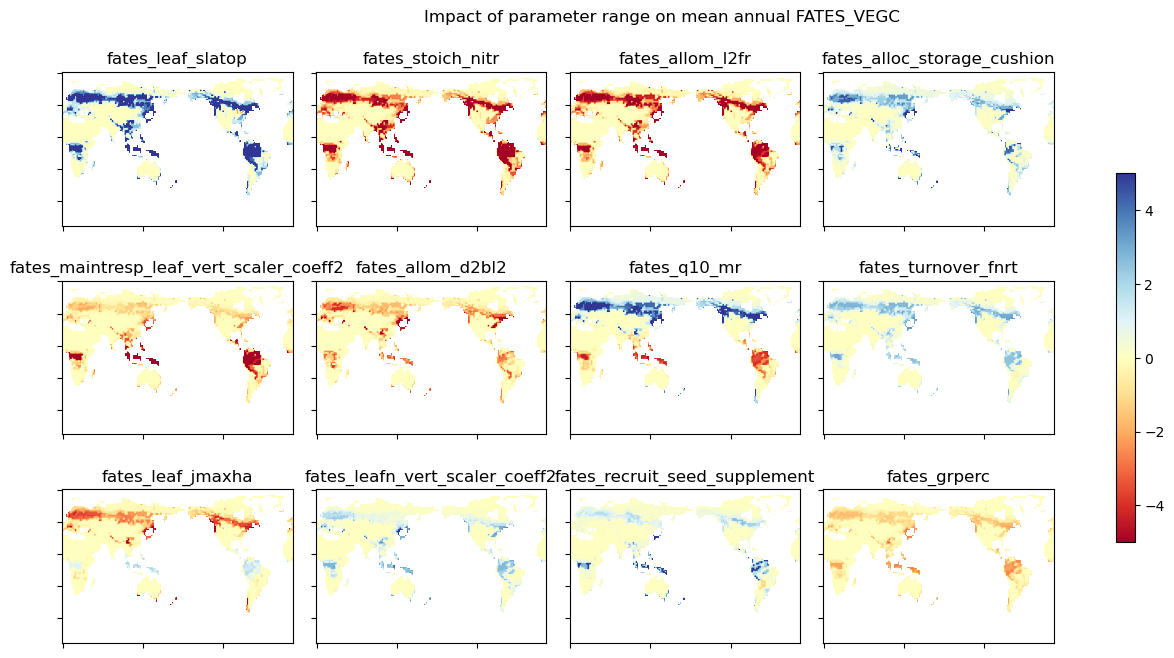

['fates_leaf_slatop', 'fates_stoich_nitr', 'fates_allom_l2fr', 'fates_alloc_storage_cushion', 'fates_maintresp_leaf_vert_scaler_coeff2', 'fates_allom_d2bl2', 'fates_q10_mr', 'fates_turnover_fnrt', 'fates_leaf_jmaxha', 'fates_leafn_vert_scaler_coeff2', 'fates_recruit_seed_supplement', 'fates_grperc']


In [23]:
plot_top_param_effects('FATES_VEGC',[0 ,12],5)

FATES_VEGC
fates_allom_d2h2
fates_turnover_leaf
fates_mort_bmort
fates_leaf_jmaxhd
fates_mort_disturb_frac
fates_allom_agb2
fates_mort_freezetol
fates_allom_d2bl1
fates_alloc_store_priority_frac
fates_recruit_height_min
fates_allom_blca_expnt_diff
fates_allom_sai_scaler


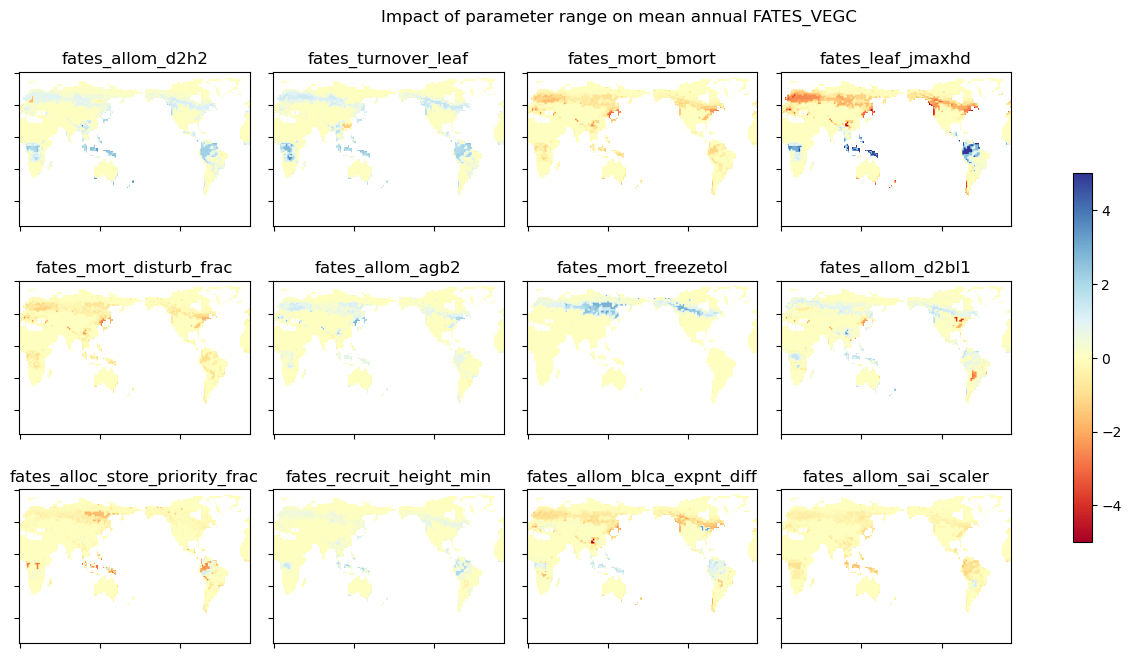

['fates_allom_d2h2', 'fates_turnover_leaf', 'fates_mort_bmort', 'fates_leaf_jmaxhd', 'fates_mort_disturb_frac', 'fates_allom_agb2', 'fates_mort_freezetol', 'fates_allom_d2bl1', 'fates_alloc_store_priority_frac', 'fates_recruit_height_min', 'fates_allom_blca_expnt_diff', 'fates_allom_sai_scaler']


In [24]:
plot_top_param_effects('FATES_VEGC',[13 ,25],5)

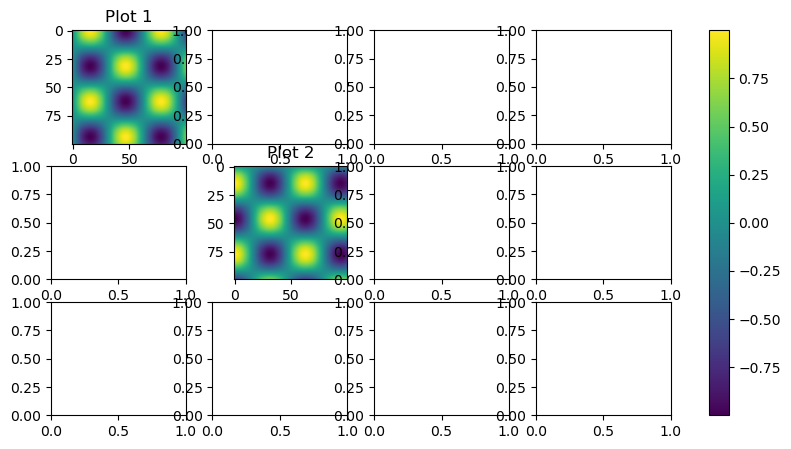

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some sample data
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)
Z1 = np.sin(X) * np.cos(Y)
Z2 = np.cos(X) * np.sin(Y)

# Create subplots using the axes method
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(10, 5))

# Plot the first subplot
im1 = axs[0,0].imshow(Z1, cmap='viridis')
axs[0,0].set_title('Plot 1')

# Plot the second subplot
im2 = axs[1,1].imshow(Z2, cmap='viridis')
axs[1,1].set_title('Plot 2')

# Create a colorbar on the right-hand side
cbar = fig.colorbar(im2, ax=axs, orientation='vertical')

plt.show()

In [26]:
filename1= '/glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin239/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin1.clm2.h0.0030-02-01-00000.nc'
da1=xr.open_mfdataset(filename1, decode_times=False)
mapped_da1=get_map(da1)

filename2= '/glade/derecho/scratch/rfisher/archive/FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin239/lnd/hist/FATES_NOCOMP_FBG_PPE_spbase_nudged_vertsc_dayl_intmaxmin2.clm2.h0.0030-02-01-00000.nc'
da2=xr.open_mfdataset(filename2, decode_times=False)
mapped_da2=get_map(da2)

diff=np.nanmean(mapped_da1.FATES_LAI,0)
diff = np.flip(diff,0)
plt.imshow(diff,cmap='RdYlBu')
plt.colorbar()


OSError: no files to open